### ILUKKUMBURA I.M.E.I.B. 220235V

In [3]:
import cv2 as cv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Question 01 

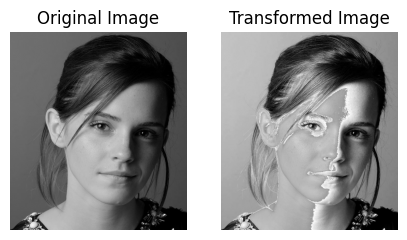

In [167]:
img = cv.imread('./emma.jpg', cv.IMREAD_GRAYSCALE)

lut = np.zeros(256, dtype=np.uint8)
lut[0:51] = np.linspace(0, 100, 51, dtype=np.uint8)
lut[51:151] = np.linspace(101, 255, 100, dtype=np.uint8)
lut[151:256] = np.linspace(150, 255, 105, dtype=np.uint8)

transformed_img = cv.LUT(img, lut)

plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(transformed_img, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')
plt.show()

# Question 2 

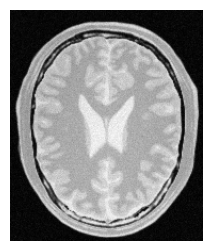

In [168]:
im3 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE  )
plt.figure(figsize=(5,3))
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()



white matter


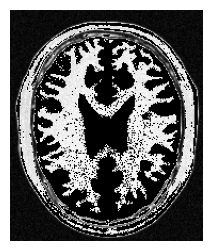

gray matter


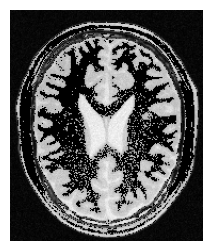

In [170]:
white_matter = im3.copy()
gray_matter = im3.copy()

gray_matter[(im3 > 125) & (im3 < 175)] = 0
white_matter[im3 > 175] = 0

print("white matter")
plt.figure(figsize=(5,3))
plt.imshow(white_matter, cmap='gray')
plt.axis('off')
plt.show()

print("gray matter")
plt.figure(figsize=(5,3))
plt.imshow(gray_matter, cmap='gray')
plt.axis('off')
plt.show()


# Question 3

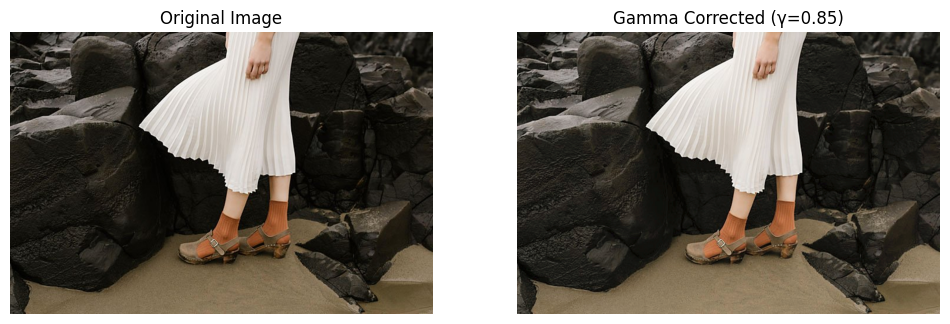

<Figure size 500x300 with 0 Axes>

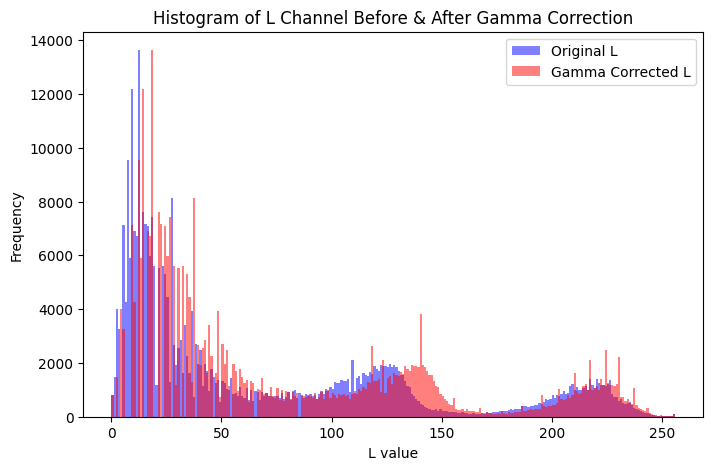

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


gamma =0.85
img = cv.imread('highlights_and_shadows.jpg')

# Convert to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)


L_float = L / 255.0
L_gamma = np.clip((L_float ** gamma) * 255, 0, 255).astype(np.uint8)


lab_gamma = cv.merge([L_gamma, a, b])
img_gamma = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
plt.figure(figsize=(5,3))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Gamma Corrected (γ={gamma})')
for a in ax:
    a.axis('off')
plt.show()


plt.figure(figsize=(8,5))
plt.hist(L.ravel(), bins=256, range=(0,256), color='blue', alpha=0.5, label='Original L')
plt.hist(L_gamma.ravel(), bins=256, range=(0,256), color='red', alpha=0.5, label='Gamma Corrected L')
plt.legend()
plt.title("Histogram of L Channel Before & After Gamma Correction")
plt.xlabel("L value")
plt.ylabel("Frequency")
plt.show()


# Question 4

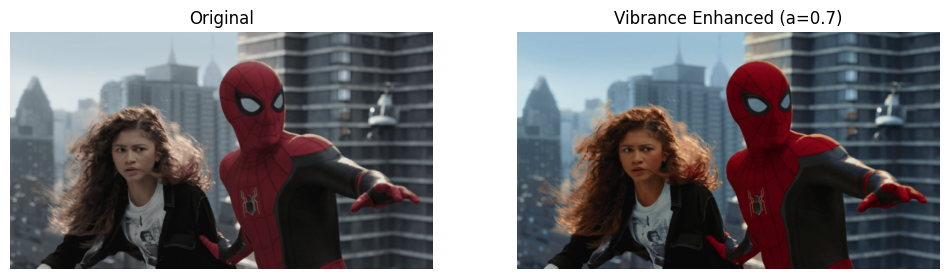

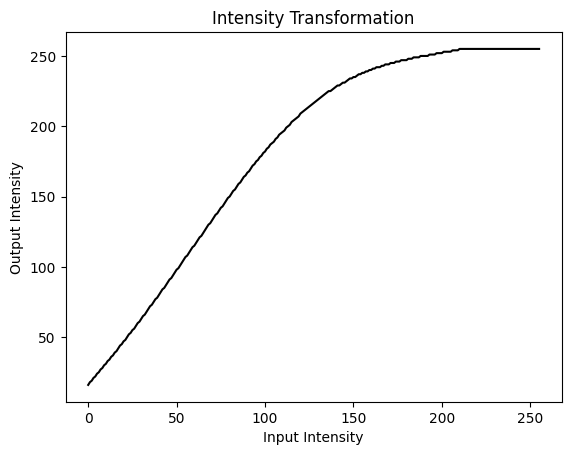

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

a = 0.70
sigma = 70

img = cv.imread('spider.png')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

x = np.arange(256, dtype=np.float32)
transform = np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255).astype(np.uint8)
s_new = cv.LUT(s, transform)

hsv_new = cv.merge([h, s_new, v])
img_new = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Vibrance Enhanced (a={a})')
for a_ in ax:
    a_.axis('off')
plt.show()

plt.plot(x, transform, color='black')
plt.title('Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()


# Question 5 


In [133]:
def equalize_histogram(img):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    cdf = hist.cumsum()

    plt.plot(cdf, color='black')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.show()

    plt.plot(hist, color='blue')
    plt.title('Original Histogram')
    plt.show()

    cdf_normalized = (cdf * 255 / cdf[-1]).astype(np.uint8)
    img_eq = cdf_normalized[img]

    hist_eq = cv.calcHist([img_eq], [0], None, [256], [0, 256])
    hist_eq = hist_eq / hist_eq.sum()

    plt.plot(hist_eq, color='red')
    plt.title('Equalized Histogram')
    plt.show()

    return img_eq


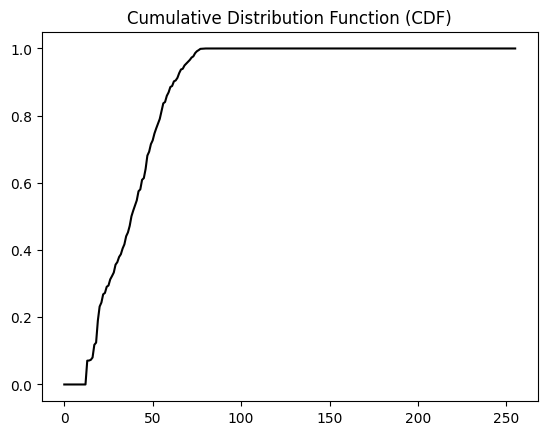

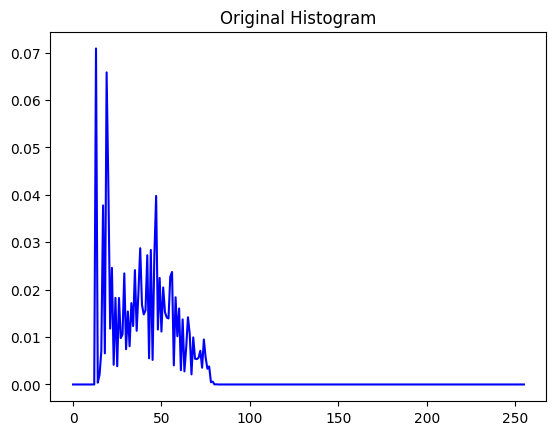

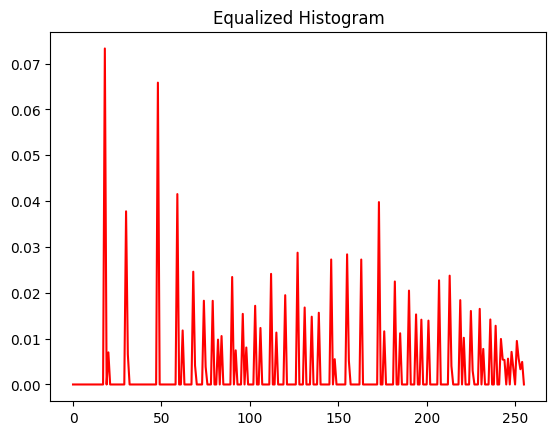

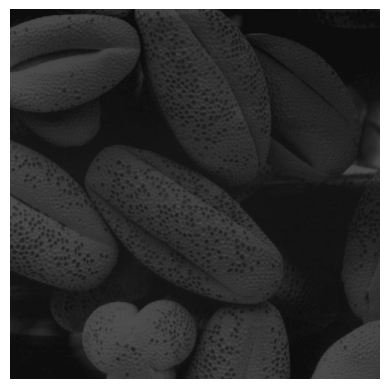

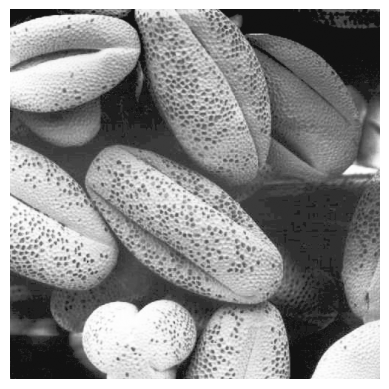

In [136]:
im6 = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
eqim1 = equalize_histogram(im6)

plt.imshow(im6, cmap='gray' ,vmin=0, vmax=255)
plt.axis('off')  # Hide axes
plt.show()  
plt.imshow(eqim1, cmap='gray' ,vmin=0, vmax=255)
plt.axis('off')  # Hide axes
plt.show()

# Question 6 


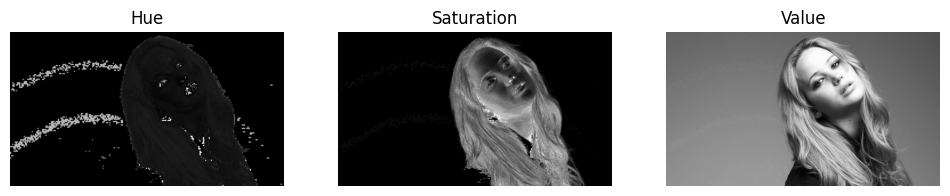

In [86]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# (a) Load image and split into H, S, V
fig6 = cv.imread('jeniffer.jpg')
hsv = cv.cvtColor(fig6, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Display H, S, V planes
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(h, cmap='gray'); plt.title('Hue'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(s, cmap='gray'); plt.title('Saturation'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(v, cmap='gray'); plt.title('Value'); plt.axis('off')
plt.show()



Lets select Saturation Plane 

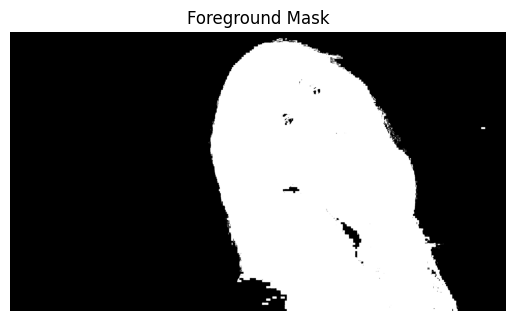

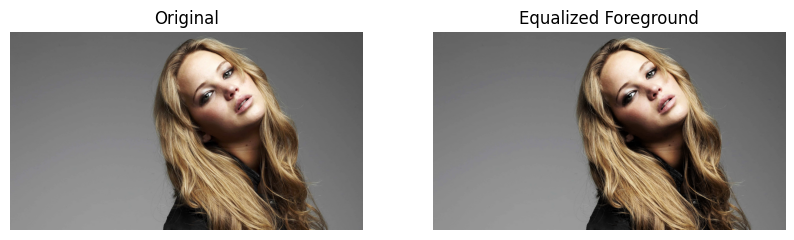

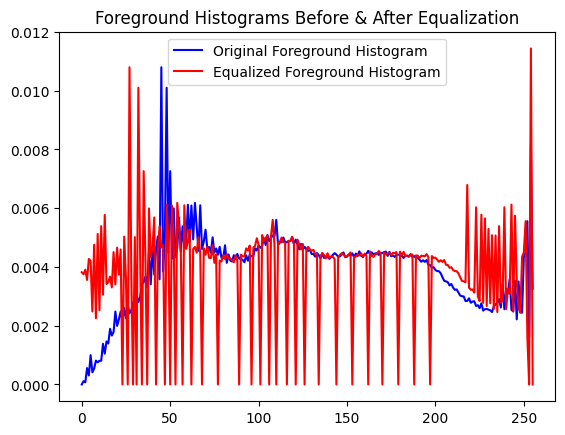

In [93]:
# (b) Threshold to create mask (using S plane here)
_, mask = cv.threshold(s, 11, 255, cv.THRESH_BINARY )

plt.imshow(mask, cmap='gray'); plt.title('Foreground Mask'); plt.axis('off'); plt.show()

# (c) Foreground only from V plane
foreground = cv.bitwise_and(v, v, mask=mask)

# Compute histogram of foreground only
hist = cv.calcHist([foreground], [0], mask, [256], [0, 256])
hist_norm = hist / hist.sum()

# (d) Cumulative sum (CDF)
cdf = hist_norm.cumsum()

# (e) Histogram equalization on foreground using CDF
cdf_min = cdf[np.nonzero(cdf)][0]
cdf_scaled = ((cdf - cdf_min) / (1 - cdf_min) * 255).astype(np.uint8)
v_eq_foreground = cdf_scaled[foreground]

# Replace only foreground in V plane
v_result = v.copy()
v_result[mask > 0] = v_eq_foreground[mask > 0]

# (f) Merge back into HSV and convert to BGR
hsv_result = cv.merge([h, s, v_result])
final_img = cv.cvtColor(hsv_result, cv.COLOR_HSV2BGR)

# Display original and result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(fig6, cv.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB)); plt.title('Equalized Foreground'); plt.axis('off')
plt.show()

# Plot histograms of V plane before/after for foreground
plt.plot(hist_norm, color='blue', label='Original Foreground Histogram')
hist_eq = cv.calcHist([v_result], [0], mask, [256], [0, 256])
plt.plot(hist_eq / hist_eq.sum(), color='red', label='Equalized Foreground Histogram')
plt.legend()
plt.title("Foreground Histograms Before & After Equalization")
plt.show()


# Question 7


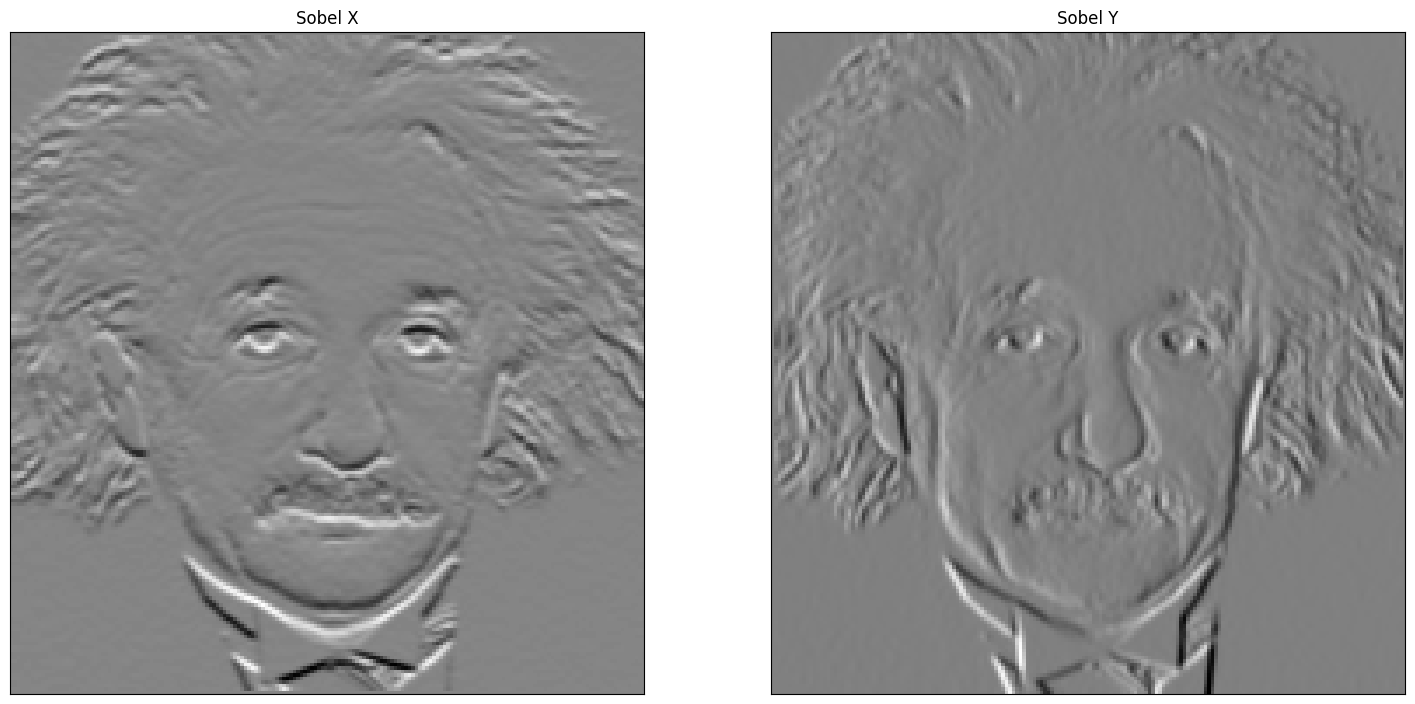

In [156]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


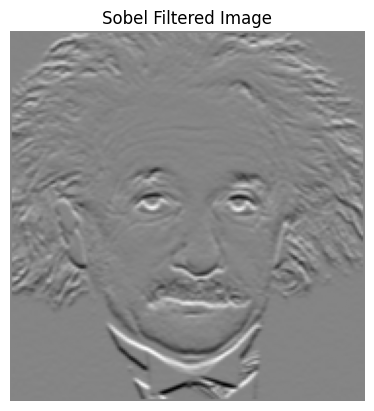

In [157]:
sobel = np.zeros(np.shape(im))
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
for i in range(1,len(im)-1):
    for j in range(1,len(im[i])-1):
        #sobel[i][j] = im[i-1][j-1] * sobel_x[0][0] + im[i-1][j] * sobel_x[0][1] + im[i-1][j+1] * sobel_x[0][2] + im[i][j-1] * sobel_x[1][0] + im[i][j] * sobel_x[1][1] + im[i][j+1] * sobel_x[1][2] + im[i+1][j-1] * sobel_x[2][0] + im[i+1][j] * sobel_x[2][1] + im[i+1][j+1] * sobel_x[2][2]
        for x in range(3):
            for y in range(3):
                sobel[i][j] += im[i-1+x][j-1+y] * sobel_x[x][y]
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Filtered Image')
plt.axis('off')
plt.show()

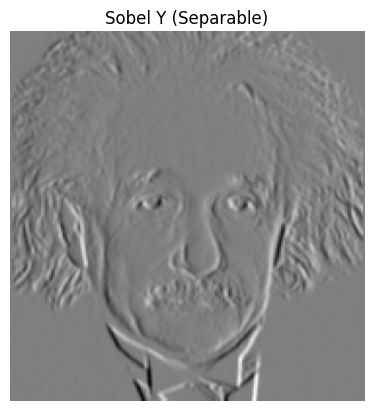

In [ ]:
v_kernel = np.array([[1], [2], [1]])      # vertical kernel
h_kernel = np.array([[1, 0, -1]])         # horizontal kernel

temp_x = cv.filter2D(im, cv.CV_64F, h_kernel)
sobel_x_sep = cv.filter2D(temp_x, cv.CV_64F, v_kernel)


plt.imshow(sobel_x_sep, cmap='gray')
plt.title('Sobel Y (Separable)')
plt.axis('off')  

plt.show()

# Question 8



im01.png:
  Nearest Neighbor SSD: 136.2691
  Bilinear SSD:         115.0919



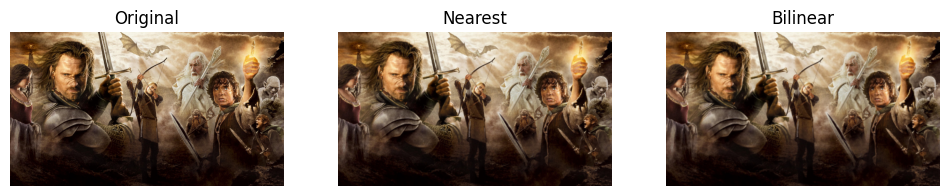

im02.png:
  Nearest Neighbor SSD: 26.4461
  Bilinear SSD:         18.3459



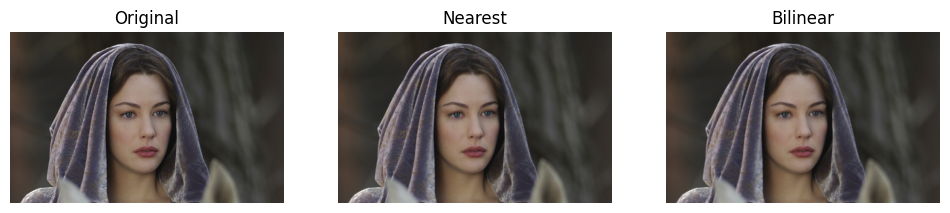

In [160]:

import glob

def zoom_image(img, scale, method='nearest'):
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    if method == 'nearest':
        interp = cv.INTER_NEAREST
    elif method == 'bilinear':
        interp = cv.INTER_LINEAR
    else:
        raise ValueError("Method must be 'nearest' or 'bilinear'")
    
    return cv.resize(img, (new_w, new_h), interpolation=interp)

def normalized_ssd(img1, img2):
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    return ssd / np.prod(img1.shape)

# Loop over given image pairs
scale_factor = 4
image_pairs = [
    ("./a1q8images/im01.png", "./a1q8images/im01small.png"),
    ("./a1q8images/im02.png", "./a1q8images/im02small.png")
]

for large_path, small_path in image_pairs:
    original_large = cv.imread(large_path, cv.IMREAD_COLOR)
    small_image = cv.imread(small_path, cv.IMREAD_COLOR)
    
    # Zoom using both methods
    zoomed_nearest = zoom_image(small_image, scale_factor, method='nearest')
    zoomed_bilinear = zoom_image(small_image, scale_factor, method='bilinear')

    # Resize original to match
    original_resized = cv.resize(original_large, (zoomed_nearest.shape[1], zoomed_nearest.shape[0]))

    # Compute SSD
    ssd_nearest = normalized_ssd(zoomed_nearest, original_resized)
    ssd_bilinear = normalized_ssd(zoomed_bilinear, original_resized)

    print(f"{large_path.split('/')[-1]}:")
    print(f"  Nearest Neighbor SSD: {ssd_nearest:.4f}")
    print(f"  Bilinear SSD:         {ssd_bilinear:.4f}\n")

    # Optional visualization
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1); plt.title("Original"); plt.imshow(cv.cvtColor(original_resized, cv.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,3,2); plt.title("Nearest"); plt.imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,3,3); plt.title("Bilinear"); plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB)); plt.axis('off')
    plt.show()


# Question 9

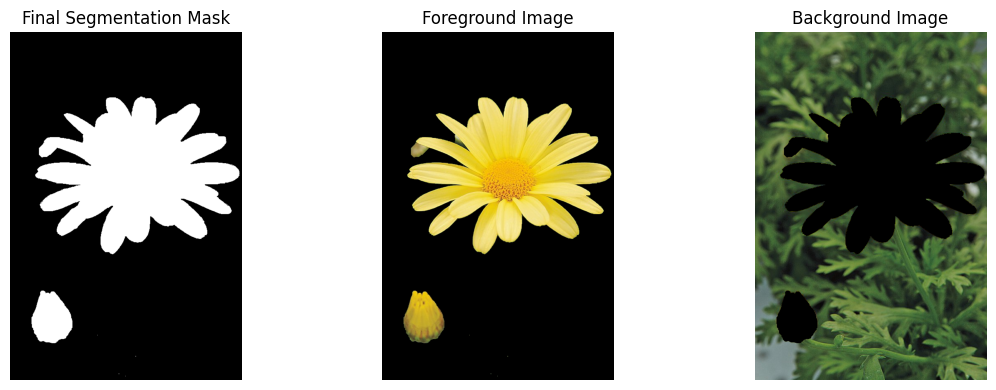

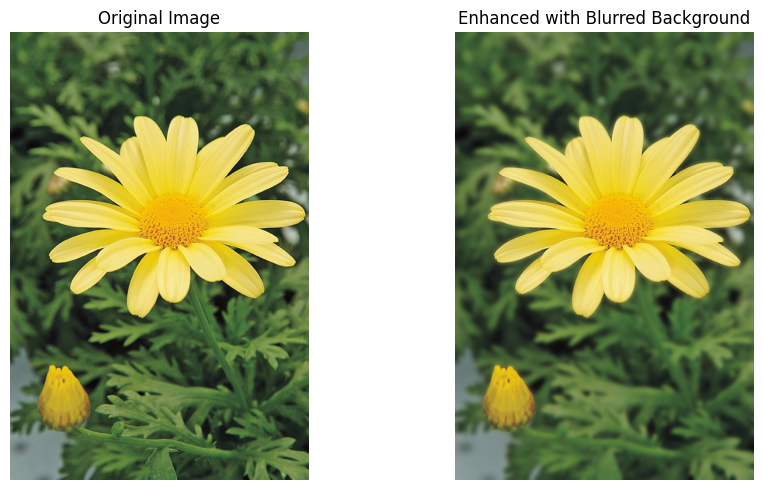

In [161]:

flower_bgr = cv.imread('./daisy.jpg')
flower_rgb = cv.cvtColor(flower_bgr, cv.COLOR_BGR2RGB)

mask_gc = np.zeros(flower_rgb.shape[:2], np.uint8)
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

rect_init = (50, 50, flower_rgb.shape[1] - 50, flower_rgb.shape[0] - 50)

cv.grabCut(flower_rgb, mask_gc, rect_init, bg_model, fg_model, 5, cv.GC_INIT_WITH_RECT)

mask_binary = np.where((mask_gc == cv.GC_FGD) | (mask_gc == cv.GC_PR_FGD), 1, 0).astype('uint8')

flower_foreground = flower_rgb * mask_binary[:, :, np.newaxis]
flower_background = flower_rgb * (1 - mask_binary)[:, :, np.newaxis]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(mask_binary, cmap='gray')
plt.title("Final Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(flower_foreground)
plt.title("Foreground Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(flower_background)
plt.title("Background Image")
plt.axis('off')
plt.tight_layout()
plt.show()

blurred_background = cv.GaussianBlur(flower_rgb, (21, 21), 0)

mask_float = cv.GaussianBlur(mask_binary.astype(np.float32), (15, 15), 0)
mask_float = cv.merge([mask_float, mask_float, mask_float])

enhanced_flower = (flower_rgb * mask_float + blurred_background * (1 - mask_float)).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(flower_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_flower)
plt.title("Enhanced with Blurred Background")
plt.axis('off')

plt.tight_layout()
plt.show()


The background just beyond the edge of the flower appears dark because the GrabCut segmentation mask is not perfectly aligned with the flower’s true boundary. Pixels near the edge are classified as background or probable background, so when compositing, these pixels are replaced with dark or blurred background values, creating a visible halo. This is a result of the hard binary mask produced by GrabCut without edge refinement.

Github - https://github.com/induwara-iluk/Image-Processing-and-Computer-vision